# Trying to parallelize construction of SPN (Made basically no difference)

In [158]:
import numpy as np
import multiprocessing.pool as mpp
import multiprocessing as mp



def give_random_number(a, b, c, message) -> int:
    return message.upper(), message.lower()

def give_random_numbers(n : int) -> np.ndarray:
    with mpp.ThreadPool(processes=mp.cpu_count()) as pool:
        return pool.starmap(give_random_number, iterable=[(1, 2, 3, m) for m in ["hey", "ho", "let's go"]])

In [160]:
import sys
try:
    del sys.modules["spnhelp"]
except:
    pass
from clg import noise
import spnhelp
from math import sqrt
from spn.io.Text import spn_to_str_equation
import pandas as pd
from spn.structure.leaves.parametric.Parametric import Gaussian, Uniform
import numpy as np
import matplotlib.pyplot as plt
from spn.structure.Base import get_number_of_nodes, get_depth
from spn.algorithms.Inference import likelihood
import scipy.stats as stats
from IPython.display import display

In [169]:
A = "A" @ noise  # noise is an i.i.d. gaussian with mean 0 and variance 1. The @ operator assigns a name to the variable.
B = "B" @ (A + 1.2*noise + 1) # They can be composed with other variables, and more noise can be added.
C = "C" @ (A + noise + 4)
D = "D" @ (B + 0.3*C + noise - 5)

K = "K" @ (noise - 6)
J = "J" @ (0.5 * K - 3 + 0.2*noise)
A & K # Here, we join the two pgms, which have no connecting edges between them.
# display(A.get_graph(detailed=False))
None

In [162]:
import multiprocessing
multiprocessing.cpu_count()

8

parallelizing!
parallelizing!
771 nodes, with depth of 8


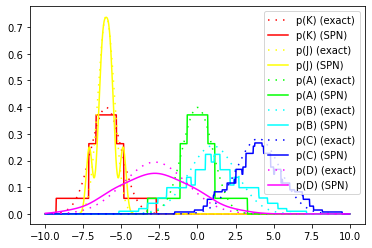

In [164]:
spn = spnhelp.pgm_to_spn_parallel(A, eps = 0.2, threads=4)
spnhelp.plot_marginals(spn, A)
print(get_number_of_nodes(spn), "nodes, with depth of", get_depth(spn))